# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

**Answer**: Our goal for this task is to find the features in the car data given to us which most significantly impact the price of a used car. Utilizing multiple different regression strategies and cross-validation techniques, I plan to determine which combination of features that we can report back to the car dealerships about what makes a used car more or less expensive. This may include an analysis of different regularization techniques (e.g. L1 vs L2) and seeing which cost functions perform better on a testing slice of the data. With regularization, we can look at the coefficients of the models to see which features are most significant in the accurately predicting used car prices. Prior to running regularization, I will use GridSearchCV to 

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
vehicles_df = pd.read_csv('data/vehicles.csv')

In [3]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [4]:
vehicles_df.head(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


In [5]:
vehicles_df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


<AxesSubplot:ylabel='price'>

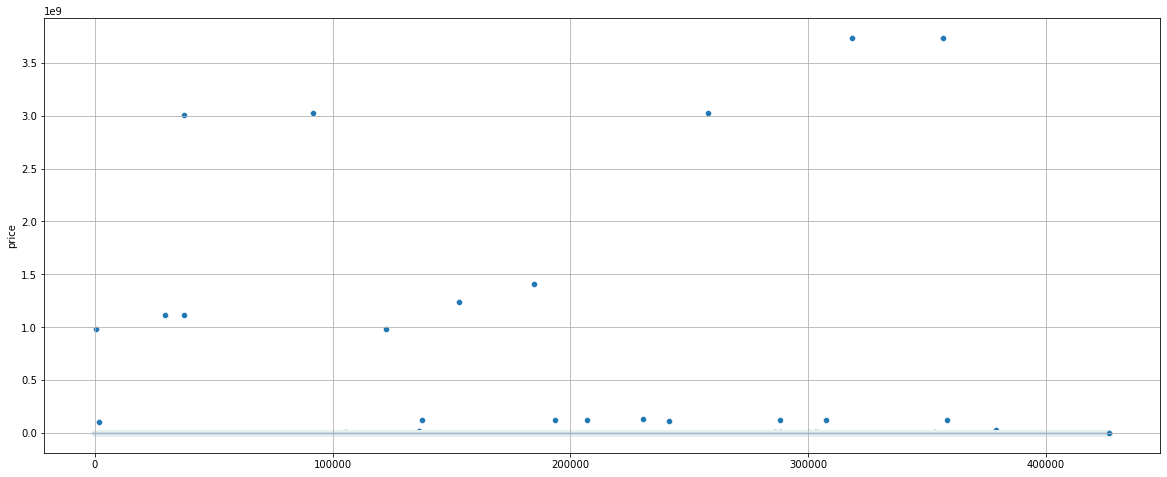

In [6]:
plt.figure(figsize=(20, 8))
plt.grid(True)
sns.scatterplot(data=vehicles_df, x=vehicles_df.index, y='price')

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

#### Drop irrelevant columns

In [7]:
vehicles_df.drop(['VIN', 'id'], axis=1, inplace=True)

In [8]:
len(vehicles_df['model'].unique())

29650

**Note:** *Because there are way too many car models to account for, I will also drop it from my analysis*

In [9]:
vehicles_df.drop(['model'], axis=1, inplace=True)
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   condition     252776 non-null  object 
 5   cylinders     249202 non-null  object 
 6   fuel          423867 non-null  object 
 7   odometer      422480 non-null  float64
 8   title_status  418638 non-null  object 
 9   transmission  424324 non-null  object 
 10  drive         296313 non-null  object 
 11  size          120519 non-null  object 
 12  type          334022 non-null  object 
 13  paint_color   296677 non-null  object 
 14  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 48.9+ MB


In [10]:
len(vehicles_df['region'].unique())

404

**Note:** *Similar to my issues with the car models, I will also drop the 'region' feature from my analysis since I think there are way too many regions to cover via a strategy such as one-hot encoding. I will also drop the 'size' column since it can be covered by 'type'.*

In [11]:
# TODO: vehicles_df.drop(['region', 'size'], axis=1, inplace=True)
vehicles_df.drop('size', axis=1, inplace=True)
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   condition     252776 non-null  object 
 5   cylinders     249202 non-null  object 
 6   fuel          423867 non-null  object 
 7   odometer      422480 non-null  float64
 8   title_status  418638 non-null  object 
 9   transmission  424324 non-null  object 
 10  drive         296313 non-null  object 
 11  type          334022 non-null  object 
 12  paint_color   296677 non-null  object 
 13  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 45.6+ MB


#### IMPORTANT NOTE:

I felt the need to drop the 'state' column as well because in my one-hot encoding of all 50 states (which I encountered later on in the modeling portion of this task), I was adding way too many features for my code to build models properly. LASSO was taking too long and wasn't zeroing out any of the features that I had. Instead, I will work under the pretense that I am pitching my findings to California used car dealerships since I am currently a California resident.

In [12]:
vehicles_df = vehicles_df[vehicles_df['state'] == 'ca']
vehicles_df.drop('state', axis=1, inplace=True)
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50614 entries, 21171 to 71784
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        50614 non-null  object 
 1   price         50614 non-null  int64  
 2   year          50498 non-null  float64
 3   manufacturer  48559 non-null  object 
 4   condition     33104 non-null  object 
 5   cylinders     30013 non-null  object 
 6   fuel          50547 non-null  object 
 7   odometer      49456 non-null  float64
 8   title_status  48994 non-null  object 
 9   transmission  50379 non-null  object 
 10  drive         34811 non-null  object 
 11  type          41079 non-null  object 
 12  paint_color   33828 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 5.4+ MB


#### Remove all null values

In [13]:
vehicles_df.dropna(inplace=True)
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12886 entries, 21174 to 71772
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        12886 non-null  object 
 1   price         12886 non-null  int64  
 2   year          12886 non-null  float64
 3   manufacturer  12886 non-null  object 
 4   condition     12886 non-null  object 
 5   cylinders     12886 non-null  object 
 6   fuel          12886 non-null  object 
 7   odometer      12886 non-null  float64
 8   title_status  12886 non-null  object 
 9   transmission  12886 non-null  object 
 10  drive         12886 non-null  object 
 11  type          12886 non-null  object 
 12  paint_color   12886 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.4+ MB


In [14]:
vehicles_df.head()

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
21174,bakersfield,11975,2003.0,harley-davidson,excellent,8 cylinders,gas,207000.0,clean,automatic,rwd,pickup,black
21176,bakersfield,21950,2003.0,chevrolet,excellent,8 cylinders,diesel,202537.0,clean,automatic,4wd,truck,grey
21178,bakersfield,27590,2018.0,acura,good,6 cylinders,gas,20420.0,clean,other,fwd,sedan,black
21185,bakersfield,3975,2006.0,pontiac,excellent,4 cylinders,gas,187000.0,clean,automatic,fwd,sedan,silver
21187,bakersfield,32500,1987.0,volkswagen,excellent,4 cylinders,gas,177313.0,clean,automatic,rwd,mini-van,blue


#### Remove Outliers:

In [15]:
Q1 = vehicles_df['price'].quantile(0.25)
Q3 = vehicles_df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(upper_bound)
print(lower_bound)

44782.5
-17309.5


<AxesSubplot:ylabel='price'>

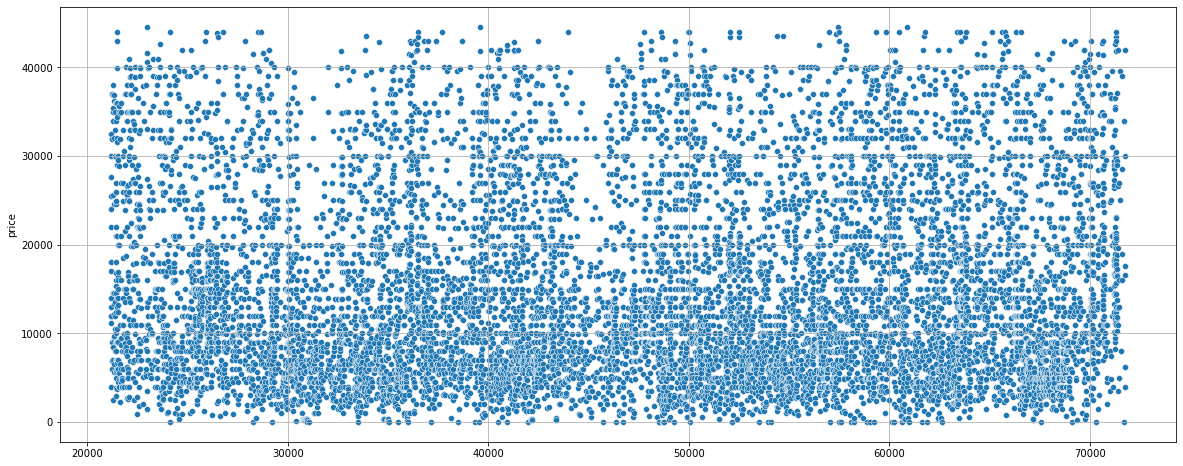

In [16]:
vehicles_df = vehicles_df[(vehicles_df['price'] < 44782.5) & (vehicles_df['price'] > 0)]
#vehicles_df.describe()
plt.figure(figsize=(20, 8))
plt.grid(True)
sns.scatterplot(data=vehicles_df, x=vehicles_df.index, y='price')

#### Remove duplicate samples

In [17]:
vehicles_df.duplicated().unique()

array([False,  True])

In [18]:
vehicles_df.drop_duplicates(inplace=True)

In [19]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10836 entries, 21174 to 71771
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        10836 non-null  object 
 1   price         10836 non-null  int64  
 2   year          10836 non-null  float64
 3   manufacturer  10836 non-null  object 
 4   condition     10836 non-null  object 
 5   cylinders     10836 non-null  object 
 6   fuel          10836 non-null  object 
 7   odometer      10836 non-null  float64
 8   title_status  10836 non-null  object 
 9   transmission  10836 non-null  object 
 10  drive         10836 non-null  object 
 11  type          10836 non-null  object 
 12  paint_color   10836 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


#### Examine features vs price:

<AxesSubplot:ylabel='price'>

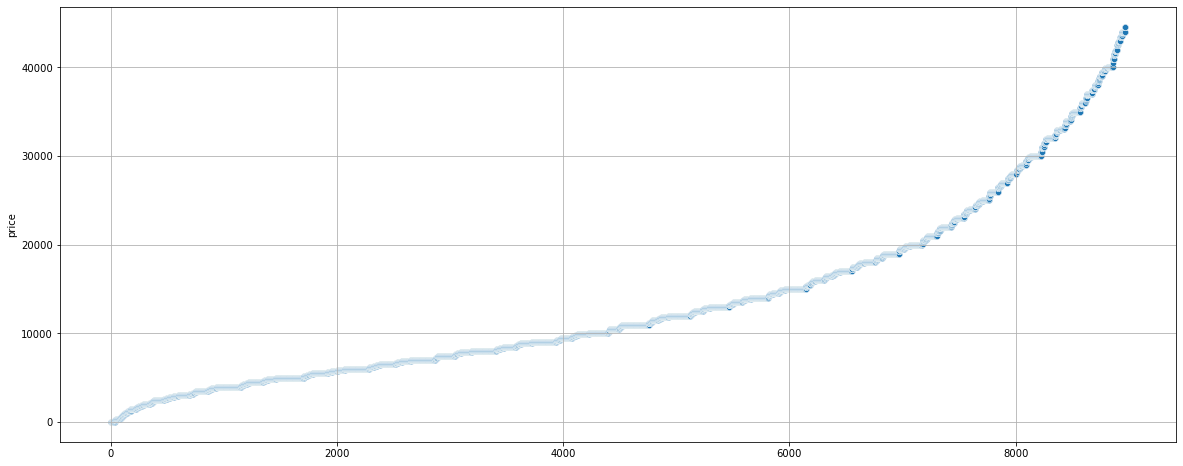

In [20]:
# TODO
tmp1 = vehicles_df[vehicles_df['transmission'] == 'automatic']
tmp1_sorted = tmp1.sort_values(by='price').reset_index(drop=True)
plt.figure(figsize=(20,8))
plt.grid(True)
sns.scatterplot(data=tmp1_sorted, x=tmp1_sorted.index, y='price')

<AxesSubplot:xlabel='title_status', ylabel='price'>

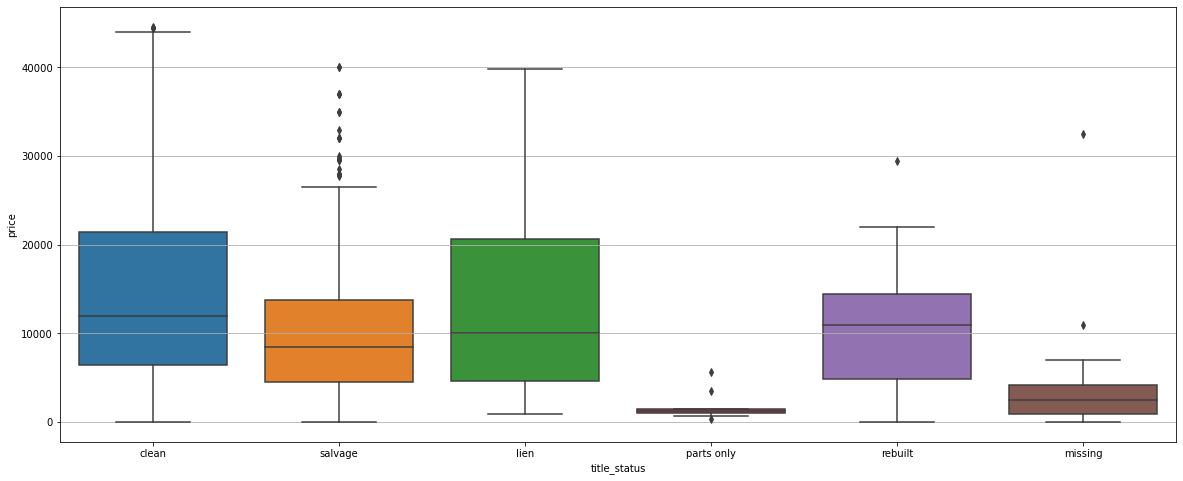

In [21]:
plt.figure(figsize=(20,8))
plt.grid(True)
sns.boxplot(data=vehicles_df, x='title_status', y='price')

**NOTE**: Because 'parts only' and 'missing' are not relevant values for a used car, I will remove them.

In [22]:
vehicles_df = vehicles_df[~vehicles_df['title_status'].isin(['parts only', 'missing'])]

In [23]:
vehicles_df['title_status'].unique()

array(['clean', 'salvage', 'lien', 'rebuilt'], dtype=object)

<AxesSubplot:xlabel='transmission', ylabel='price'>

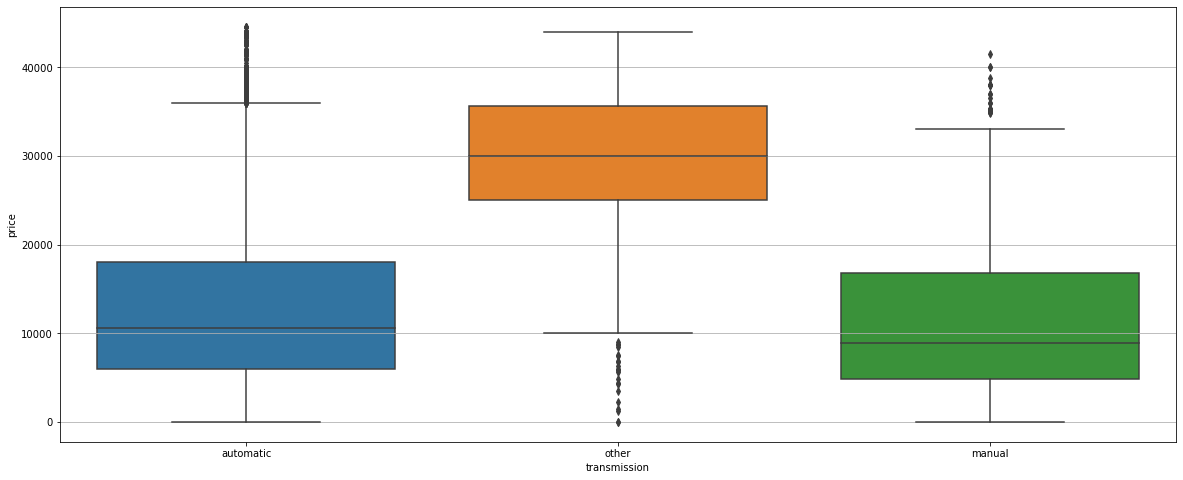

In [24]:
plt.figure(figsize=(20,8))
plt.grid(True)
sns.boxplot(data=vehicles_df, x='transmission', y='price')

<AxesSubplot:xlabel='odometer', ylabel='price'>

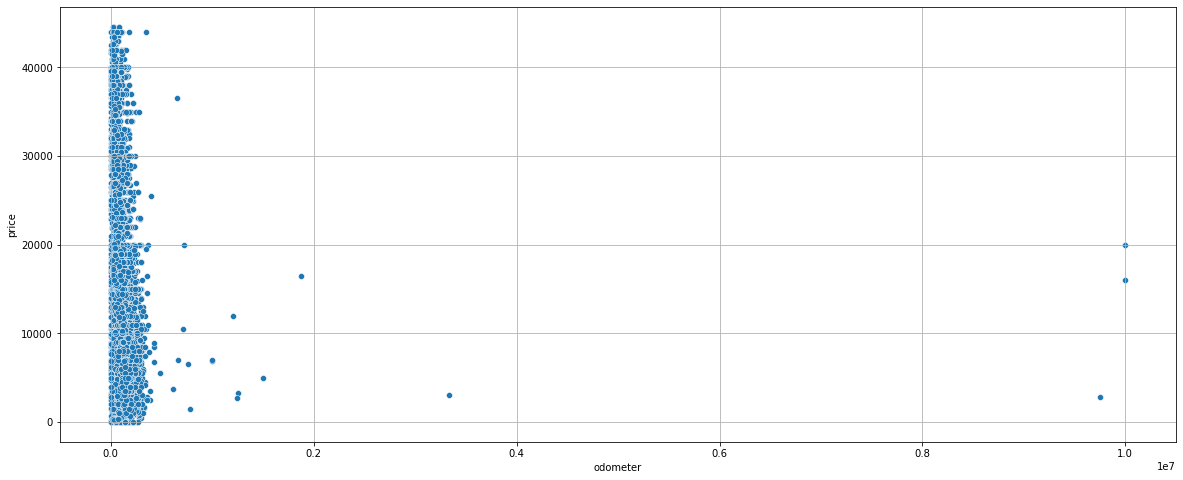

In [25]:
plt.figure(figsize=(20,8))
plt.grid(True)
sns.scatterplot(data=vehicles_df, x='odometer', y='price')

<AxesSubplot:xlabel='fuel', ylabel='price'>

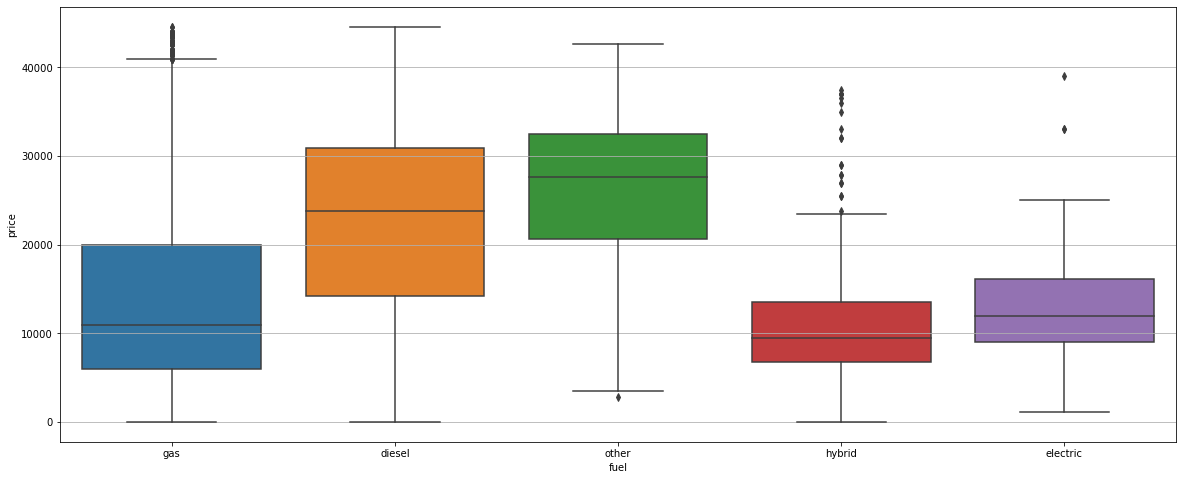

In [26]:
plt.figure(figsize=(20,8))
plt.grid(True)
sns.boxplot(data=vehicles_df, x='fuel', y='price')

<AxesSubplot:xlabel='cylinders', ylabel='price'>

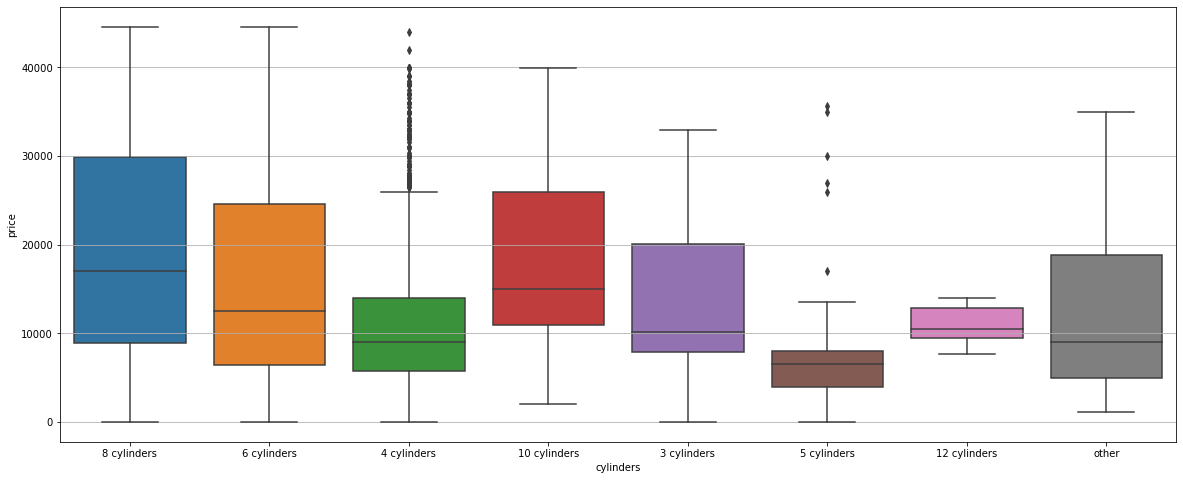

In [27]:
plt.figure(figsize=(20,8))
plt.grid(True)
sns.boxplot(data=vehicles_df, x='cylinders', y='price')

<AxesSubplot:xlabel='condition', ylabel='price'>

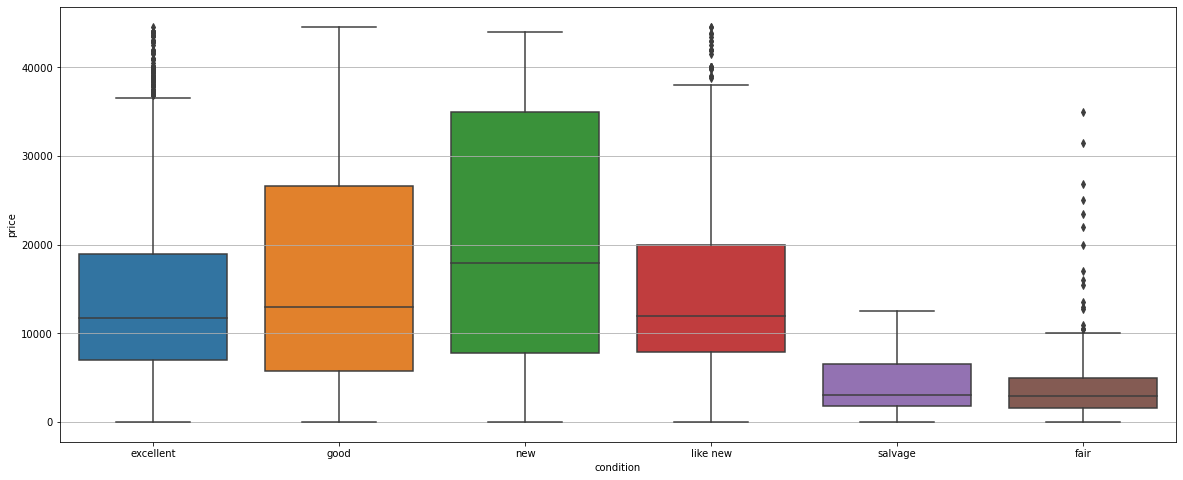

In [28]:
plt.figure(figsize=(20,8))
plt.grid(True)
sns.boxplot(data=vehicles_df, x='condition', y='price')

<AxesSubplot:xlabel='year', ylabel='price'>

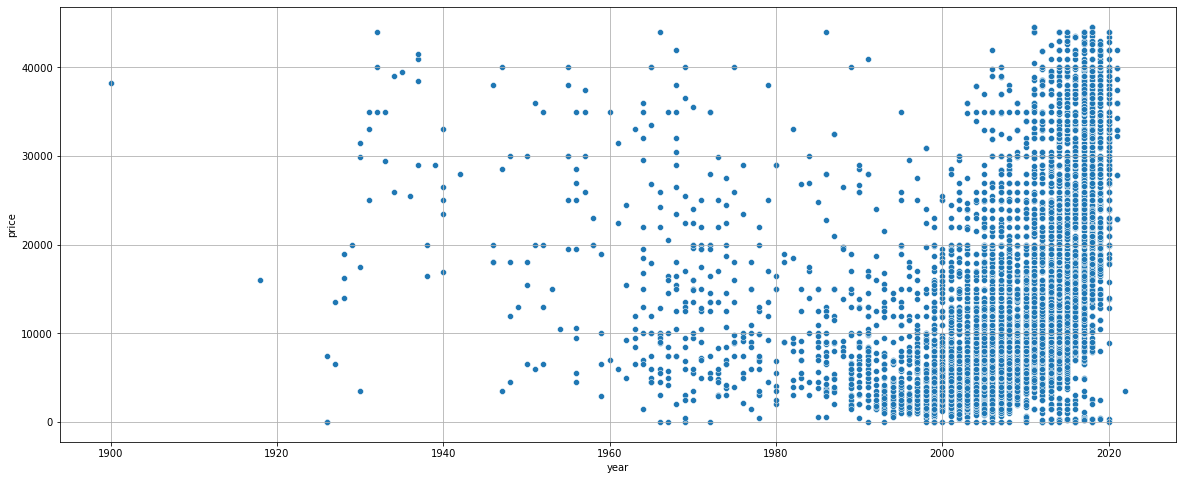

In [29]:
plt.figure(figsize=(20,8))
plt.grid(True)
sns.scatterplot(data=vehicles_df, x='year', y='price')

<AxesSubplot:xlabel='manufacturer', ylabel='price'>

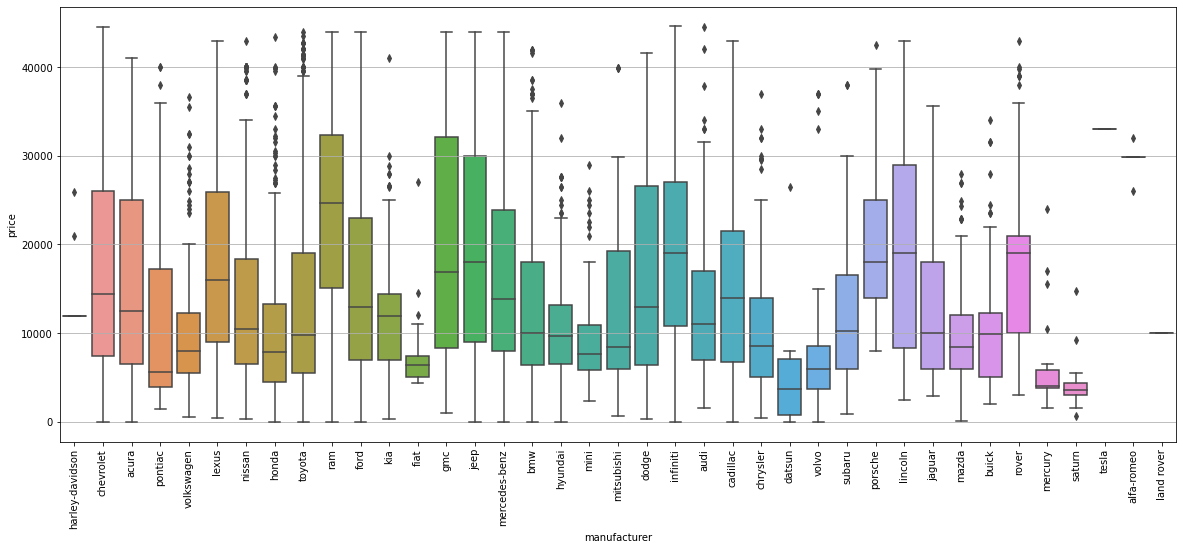

In [30]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
plt.grid(True)
sns.boxplot(data=vehicles_df, x='manufacturer', y='price')

<AxesSubplot:xlabel='drive', ylabel='price'>

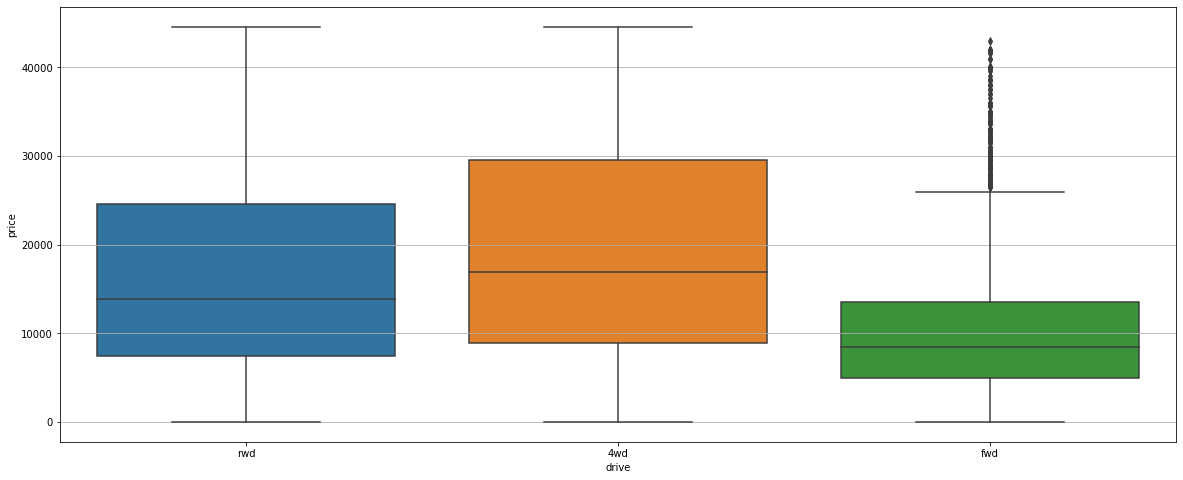

In [31]:
plt.figure(figsize=(20,8))
plt.grid(True)
sns.boxplot(data=vehicles_df, x='drive', y='price')

<AxesSubplot:xlabel='type', ylabel='price'>

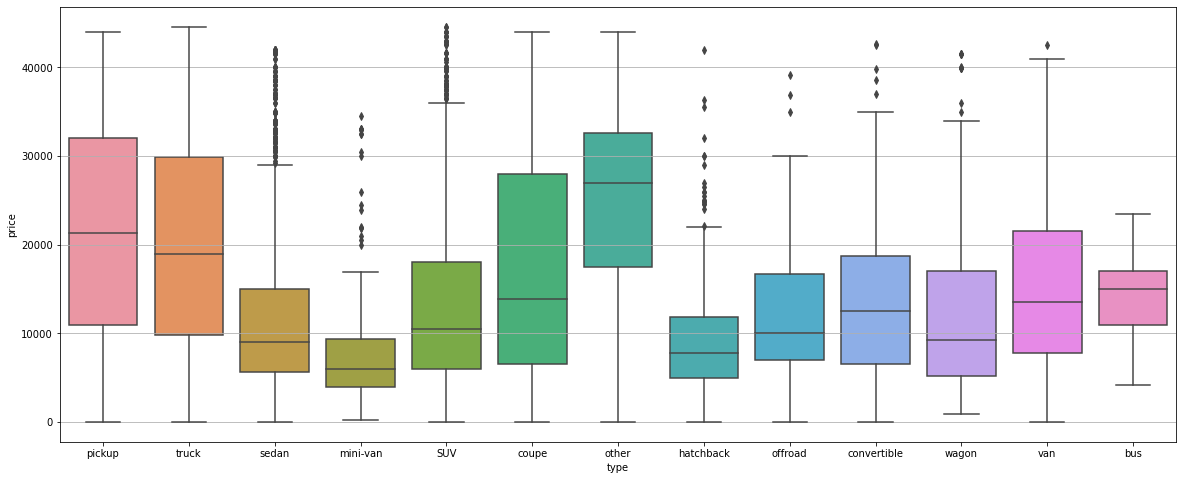

In [32]:
plt.figure(figsize=(20,8))
plt.grid(True)
sns.boxplot(data=vehicles_df, x='type', y='price')

<AxesSubplot:xlabel='paint_color', ylabel='price'>

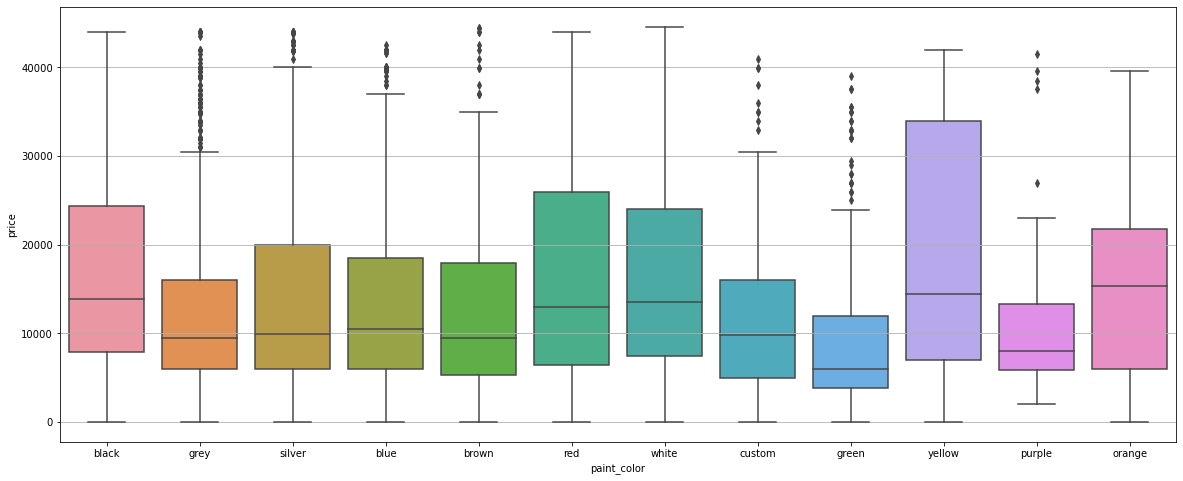

In [33]:
plt.figure(figsize=(20,8))
plt.grid(True)
sns.boxplot(data=vehicles_df, x='paint_color', y='price')

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
# TODO
vehicles_dummies_df = pd.get_dummies(vehicles_df, columns=['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'region'], drop_first=True)
vehicles_dummies_df.columns

Index(['price', 'year', 'odometer', 'manufacturer_alfa-romeo',
       'manufacturer_audi', 'manufacturer_bmw', 'manufacturer_buick',
       'manufacturer_cadillac', 'manufacturer_chevrolet',
       'manufacturer_chrysler',
       ...
       'region_san diego', 'region_san luis obispo', 'region_santa barbara',
       'region_santa maria', 'region_siskiyou county', 'region_stockton',
       'region_susanville', 'region_ventura county', 'region_visalia-tulare',
       'region_yuba-sutter'],
      dtype='object', length=115)

In [36]:
X = vehicles_dummies_df.loc[:, vehicles_dummies_df.columns != 'price']
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10802 entries, 21174 to 71771
Columns: 114 entries, year to region_yuba-sutter
dtypes: float64(2), uint8(112)
memory usage: 1.7 MB


In [37]:
y = vehicles_dummies_df['price']
print(type(y))

<class 'pandas.core.series.Series'>


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.info())
print(y_train.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7561 entries, 32589 to 56553
Columns: 114 entries, year to region_yuba-sutter
dtypes: float64(2), uint8(112)
memory usage: 1004.2 KB
None
32589     1900
47794    12999
60900     7400
69472    29590
42712     7500
Name: price, dtype: int64


In [39]:
X.head()

,year,odometer,manufacturer_alfa-romeo,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,...,region_san diego,region_san luis obispo,region_santa barbara,region_santa maria,region_siskiyou county,region_stockton,region_susanville,region_ventura county,region_visalia-tulare,region_yuba-sutter
21174,2003.0,207000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21176,2003.0,202537.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
21178,2018.0,20420.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21185,2006.0,187000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21187,1987.0,177313.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### LASSO

In [79]:
# TODO
lasso_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(random_state=42))
])

In [80]:
lasso_alpha_parameters = {'lasso__alpha': np.logspace(-3, 4, 100)}

grid_search_lasso = GridSearchCV(estimator = lasso_pipe,
                                 param_grid = lasso_alpha_parameters)

grid_search_lasso.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso', Lasso(random_state=42))]),
             param_grid={'lasso__alpha': array([1.00000000e-03, 1.17681195e-03, 1.38488637e-03, 1.62975083e-03,
       1.91791026e-03, 2.25701972e-03, 2.65608778e-03, 3.12571585e-03,
       3.67837977e-03, 4.32876128e-03, 5.09413801e-03, 5.99484250e-03,
       7.05480231e-03, 8.30217568e-03, 9.77...
       2.36448941e+02, 2.78255940e+02, 3.27454916e+02, 3.85352859e+02,
       4.53487851e+02, 5.33669923e+02, 6.28029144e+02, 7.39072203e+02,
       8.69749003e+02, 1.02353102e+03, 1.20450354e+03, 1.41747416e+03,
       1.66810054e+03, 1.96304065e+03, 2.31012970e+03, 2.71858824e+03,
       3.19926714e+03, 3.76493581e+03, 4.43062146e+03, 5.21400829e+03,
       6.13590727e+03, 7.22080902e+03, 8.49753436e+03, 1.00000000e+04])})

In [81]:
grid_search_lasso.best_estimator_.named_steps['lasso'].coef_

array([ 2.62735604e+03, -1.07110544e+03,  2.64456462e+02, -4.86814332e+00,
       -1.68157597e+02, -1.89021091e+01,  4.59738693e+00,  0.00000000e+00,
       -2.22871509e+02,  1.07448928e+02, -6.58421562e+01, -4.14421373e+01,
       -0.00000000e+00, -0.00000000e+00, -8.80846693e+01, -6.96990098e+01,
       -1.90123910e+02,  7.35636517e+01, -1.67402008e+02,  3.83870546e+02,
       -6.49492634e+01, -7.07220701e+00,  3.29364964e+02,  2.33664531e+00,
       -1.08659258e+01,  2.30151920e+02, -1.48919184e+02, -7.25053900e+01,
       -1.26963760e+02, -2.24530906e+02,  7.34577874e+01,  4.75860355e+02,
        4.16412267e+02,  9.71112167e+01, -9.40883039e+01, -2.08568868e+02,
        1.88642164e+02,  4.41769332e+01, -0.00000000e+00, -1.74506054e+01,
       -1.20897487e+03, -6.13603828e+02,  2.33874572e+02,  3.29612618e+02,
       -3.43234554e+02, -0.00000000e+00,  6.90943599e+01, -2.68041436e+02,
       -2.18817658e+02, -0.00000000e+00,  1.11508097e+03,  0.00000000e+00,
       -9.21904694e+01, -

In [84]:
grid_search_lasso.best_params_['lasso__alpha']

46.41588833612773

#### RIDGE

In [41]:
ridge_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(random_state=42))
])

In [44]:
ridge_alpha_parameters = {'ridge__alpha': np.logspace(-3, 4, 100)}

grid_search_ridge = GridSearchCV(estimator = ridge_pipe,
                                 param_grid = ridge_alpha_parameters)

grid_search_ridge.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge', Ridge(random_state=42))]),
             param_grid={'ridge__alpha': array([1.00000000e-03, 1.17681195e-03, 1.38488637e-03, 1.62975083e-03,
       1.91791026e-03, 2.25701972e-03, 2.65608778e-03, 3.12571585e-03,
       3.67837977e-03, 4.32876128e-03, 5.09413801e-03, 5.99484250e-03,
       7.05480231e-03, 8.30217568e-03, 9.77...
       2.36448941e+02, 2.78255940e+02, 3.27454916e+02, 3.85352859e+02,
       4.53487851e+02, 5.33669923e+02, 6.28029144e+02, 7.39072203e+02,
       8.69749003e+02, 1.02353102e+03, 1.20450354e+03, 1.41747416e+03,
       1.66810054e+03, 1.96304065e+03, 2.31012970e+03, 2.71858824e+03,
       3.19926714e+03, 3.76493581e+03, 4.43062146e+03, 5.21400829e+03,
       6.13590727e+03, 7.22080902e+03, 8.49753436e+03, 1.00000000e+04])})

In [45]:
grid_search_ridge.best_estimator_.named_steps['ridge'].coef_

array([ 2524.10869743, -1075.71661264,   289.15076219,   -73.37640363,
        -237.17455656,  -104.76199059,     7.21896439,   -91.37054765,
        -291.76775095,   123.44146326,  -166.94319114,   -98.32735226,
        -155.8568431 ,   -83.26602375,  -135.00491087,  -243.18213387,
        -300.64217675,    92.90330546,  -208.07370471,   340.9562555 ,
        -180.07934537,   -53.86217009,   304.62356024,    23.10194858,
        -116.79919836,   206.47676056,  -207.98053905,  -169.08722167,
        -209.41495642,  -333.68051994,    71.55725321,   466.89631759,
         397.76851453,   112.34265781,  -167.56720874,  -263.37375291,
         225.24231138,   -51.48480928,   -80.18616646,   -97.15426911,
       -1187.46995326,  -537.12927572,   276.04129534,   348.33364723,
        -358.21440785,   -27.32483775,    82.03244744,  -629.94485614,
        -303.69175545,  -324.21999105,   809.1353198 ,   -32.46151157,
        -143.28019508, -1288.07785504,  -562.66047226,  -158.42498004,
      

In [85]:
grid_search_ridge.best_params_['ridge__alpha']

533.6699231206312

#### Predictions

In [46]:
lasso_train_preds = grid_search_lasso.best_estimator_.predict(X_train)
lasso_test_preds = grid_search_lasso.best_estimator_.predict(X_test)

ridge_train_preds = grid_search_ridge.best_estimator_.predict(X_train)
ridge_test_preds = grid_search_ridge.best_estimator_.predict(X_test)

#### Mean Absolute Error

In [47]:
lasso_train_mae = mean_absolute_error(y_train, lasso_train_preds)
lasso_test_mae = mean_absolute_error(y_test, lasso_test_preds)

ridge_train_mae = mean_absolute_error(y_train, ridge_train_preds)
ridge_test_mae = mean_absolute_error(y_test, ridge_test_preds)

In [48]:
print(lasso_train_mae)
print(lasso_test_mae)
print(ridge_train_mae)
print(ridge_test_mae)

5595.905143252637
5610.318303805303
5613.948878459188
5627.763407418575


#### Root Mean Squred Error

In [49]:
lasso_train_rmse = np.sqrt(mean_squared_error(y_train, lasso_train_preds))
lasso_test_rmse = np.sqrt(mean_squared_error(y_test, lasso_test_preds))

ridge_train_rmse = np.sqrt(mean_squared_error(y_train, ridge_train_preds))
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, ridge_test_preds))

In [50]:
print(lasso_train_rmse)
print(lasso_test_rmse)
print(ridge_train_rmse)
print(ridge_test_rmse)

7582.986653265265
7479.235733772711
7579.9806778490965
7475.077719804983


#### Plot Predictions vs Actual Test Values

<AxesSubplot:xlabel='price', ylabel='price'>

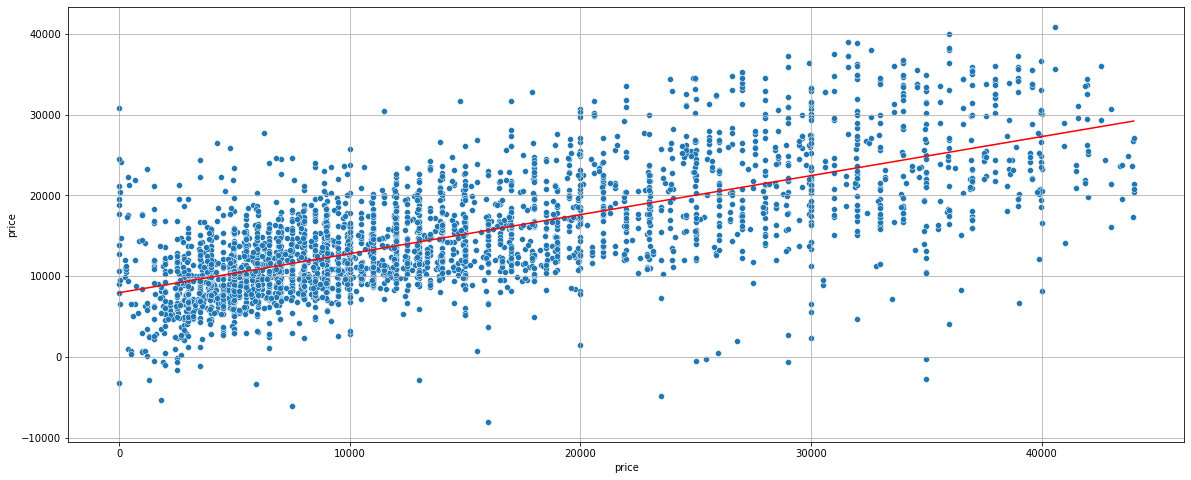

In [51]:
plt.figure(figsize=(15,15))
plt.grid(True)
sns.scatterplot(x=y_test, y=lasso_test_preds)
slope, intercept = np.polyfit(y_test, lasso_test_preds, 1)
line = slope * y_test + intercept
sns.lineplot(x=y_test, y=line, color='red')

#### Plot Residuals

<AxesSubplot:ylabel='price'>

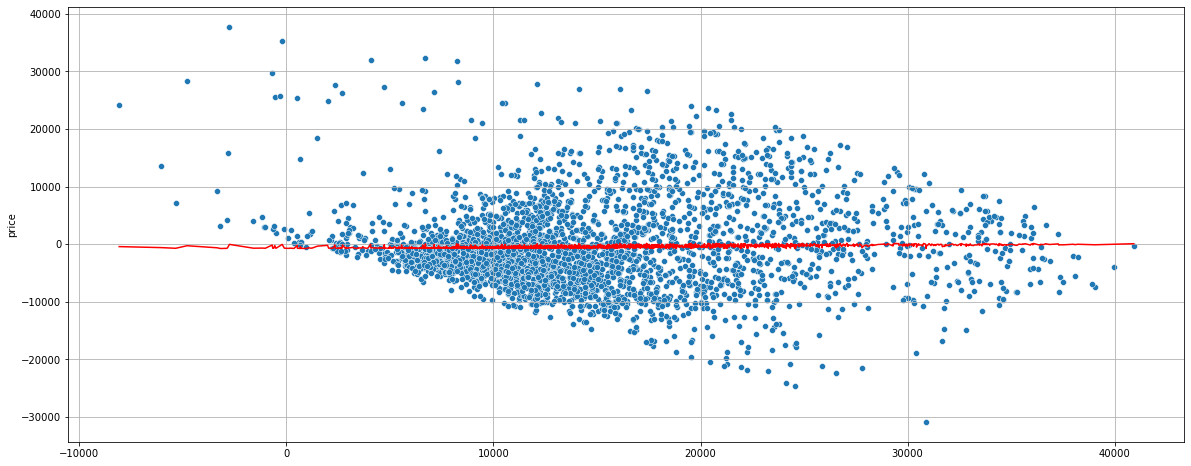

In [52]:
residuals = y_test - lasso_test_preds
plt.figure(figsize=(20,8))
plt.grid(True)
sns.scatterplot(x=lasso_test_preds, y=residuals)
slope, intercept = np.polyfit(lasso_test_preds, residuals, 1)
line = slope * y_test + intercept
sns.lineplot(x=lasso_test_preds, y=line, color='red')

# TESTING

#### LASSO

In [53]:
# TODO
lasso_pipe = Pipeline([
    ('nonlinear', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('lasso', Lasso(random_state=42))
])

#### RIDGE

In [54]:
ridge_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(random_state=42))
])

#### GridSearchCV

In [55]:
lasso_alpha_parameters = {'lasso__alpha': np.logspace(-3, 4, 100)}

grid_search_lasso = GridSearchCV(estimator = lasso_pipe,
                                 param_grid = lasso_alpha_parameters)

grid_search_lasso.fit(X_train, y_train)

C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43295703986.96285, tolerance: 68527515.03388885
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41826126031.28204, tolerance: 70260522.29675832
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40773698987.737144, tolerance: 69116223.794625
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41440759023.32839, tolerance: 68670066.03285317
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41332089232.9032, tolerance: 69059375.32311583
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43277439466.92657, tolerance: 68527515.03388885
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41808555213.62492, tolerance: 70260522.29675832
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40727488452.42239, tolerance: 69116223.794625
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41400553668.70826, tolerance: 68670066.03285317
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41263032342.552895, tolerance: 69059375.32311583
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43130021494.653656, tolerance: 68527515.03388885
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41772829573.00794, tolerance: 70260522.29675832
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40450675263.94674, tolerance: 69116223.794625
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41078984344.571304, tolerance: 68670066.03285317
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41125311894.886375, tolerance: 69059375.32311583
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42210635337.01275, tolerance: 68527515.03388885
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41456951211.419075, tolerance: 70260522.29675832
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39909760710.90844, tolerance: 69116223.794625
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39217808882.69006, tolerance: 68670066.03285317
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40047089956.584045, tolerance: 69059375.32311583
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40298922035.976524, tolerance: 68527515.03388885
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39099285312.455154, tolerance: 70260522.29675832
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36960583459.19062, tolerance: 69116223.794625
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36505875805.79445, tolerance: 68670066.03285317
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36003352079.53879, tolerance: 69059375.32311583
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33896154647.77797, tolerance: 68527515.03388885
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32174546690.10224, tolerance: 70260522.29675832
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31194985510.71963, tolerance: 69116223.794625
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30221615562.767174, tolerance: 68670066.03285317
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31635915298.3268, tolerance: 69059375.32311583
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15383451473.699951, tolerance: 68527515.03388885
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7368802936.362244, tolerance: 70260522.29675832
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7705402404.781494, tolerance: 69116223.794625
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9651535620.671814, tolerance: 68670066.03285317
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11857104104.785156, tolerance: 69059375.32311583
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4448712319.959976, tolerance: 68527515.03388885
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137196492.20202637, tolerance: 70260522.29675832
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1045127449.1560059, tolerance: 69116223.794625
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 542356244.1204224, tolerance: 68670066.03285317
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109884317.55175781, tolerance: 69059375.32311583
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81039857.12280273, tolerance: 68527515.03388885
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91648284.46829224, tolerance: 70260522.29675832
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnnak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

GridSearchCV(estimator=Pipeline(steps=[('nonlinear',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('lasso', Lasso(random_state=42))]),
             param_grid={'lasso__alpha': array([1.00000000e-03, 1.17681195e-03, 1.38488637e-03, 1.62975083e-03,
       1.91791026e-03, 2.25701972e-03, 2.65608778e-03, 3.12571585e-03,
       3.67837977e-03, 4.32876128e-03, 5.09413801e...
       2.36448941e+02, 2.78255940e+02, 3.27454916e+02, 3.85352859e+02,
       4.53487851e+02, 5.33669923e+02, 6.28029144e+02, 7.39072203e+02,
       8.69749003e+02, 1.02353102e+03, 1.20450354e+03, 1.41747416e+03,
       1.66810054e+03, 1.96304065e+03, 2.31012970e+03, 2.71858824e+03,
       3.19926714e+03, 3.76493581e+03, 4.43062146e+03, 5.21400829e+03,
       6.13590727e+03, 7.22080902e+03, 8.49753436e+03, 1.00000000e+04])})

In [56]:
(grid_search_lasso.best_estimator_.named_steps['lasso'].coef_ != 0).sum()

1724

In [57]:
ridge_alpha_parameters = {'ridge__alpha': np.logspace(-2, 4, 100)}

grid_search_ridge = GridSearchCV(estimator = ridge_pipe,
                                 param_grid = ridge_alpha_parameters, 
                                 scoring = "neg_mean_squared_error",
                                 verbose=1)

grid_search_ridge.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge', Ridge(random_state=42))]),
             param_grid={'ridge__alpha': array([1.00000000e-02, 1.14975700e-02, 1.32194115e-02, 1.51991108e-02,
       1.74752840e-02, 2.00923300e-02, 2.31012970e-02, 2.65608778e-02,
       3.05385551e-02, 3.51119173e-02, 4.03701726e-02, 4.64158883e-02,
       5.33669923e-02, 6.13590727e-02, 7.05...
       4.03701726e+02, 4.64158883e+02, 5.33669923e+02, 6.13590727e+02,
       7.05480231e+02, 8.11130831e+02, 9.32603347e+02, 1.07226722e+03,
       1.23284674e+03, 1.41747416e+03, 1.62975083e+03, 1.87381742e+03,
       2.15443469e+03, 2.47707636e+03, 2.84803587e+03, 3.27454916e+03,
       3.76493581e+03, 4.32876128e+03, 4.97702356e+03, 5.72236766e+03,
       6.57933225e+03, 7.56463328e+03, 8.69749003e+03, 1.00000000e+04])},
             scoring='neg_mean_squared_error', verbose=1)

In [58]:
grid_search_ridge.best_estimator_.named_steps['ridge'].coef_

array([ 2524.10869743, -1075.71661264,   289.15076219,   -73.37640363,
        -237.17455656,  -104.76199059,     7.21896439,   -91.37054765,
        -291.76775095,   123.44146326,  -166.94319114,   -98.32735226,
        -155.8568431 ,   -83.26602375,  -135.00491087,  -243.18213387,
        -300.64217675,    92.90330546,  -208.07370471,   340.9562555 ,
        -180.07934537,   -53.86217009,   304.62356024,    23.10194858,
        -116.79919836,   206.47676056,  -207.98053905,  -169.08722167,
        -209.41495642,  -333.68051994,    71.55725321,   466.89631759,
         397.76851453,   112.34265781,  -167.56720874,  -263.37375291,
         225.24231138,   -51.48480928,   -80.18616646,   -97.15426911,
       -1187.46995326,  -537.12927572,   276.04129534,   348.33364723,
        -358.21440785,   -27.32483775,    82.03244744,  -629.94485614,
        -303.69175545,  -324.21999105,   809.1353198 ,   -32.46151157,
        -143.28019508, -1288.07785504,  -562.66047226,  -158.42498004,
      

#### Predictions

In [59]:
lasso_train_preds = grid_search_lasso.best_estimator_.predict(X_train)
ridge_train_preds = grid_search_ridge.best_estimator_.predict(X_train)

lasso_test_preds = grid_search_lasso.best_estimator_.predict(X_test)
ridge_test_preds = grid_search_ridge.best_estimator_.predict(X_test)

#### Mean Absolute Error

In [60]:
lasso_train_mae = mean_absolute_error(y_train, lasso_train_preds)
lasso_test_mae = mean_absolute_error(y_test, lasso_test_preds)

ridge_train_mae = mean_absolute_error(y_train, ridge_train_preds)
ridge_test_mae = mean_absolute_error(y_test, ridge_test_preds)

In [61]:
print(lasso_train_mae)
print(lasso_test_mae)
print(ridge_train_mae)
print(ridge_test_mae)

3278.153038735564
4358.487732109709
5613.948878459188
5627.763407418575


#### Root Mean Squred Error

In [62]:
lasso_train_rmse = np.sqrt(mean_squared_error(y_train, lasso_train_preds))
lasso_test_rmse = np.sqrt(mean_squared_error(y_test, lasso_test_preds))

ridge_train_rmse = np.sqrt(mean_squared_error(y_train, ridge_train_preds))
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, ridge_test_preds))

In [63]:
print(lasso_train_rmse)
print(lasso_test_rmse)
print(ridge_train_rmse)
print(ridge_test_rmse)

4641.994255901113
6229.260706381871
7579.9806778490965
7475.077719804983


#### Plot Predictions vs Actual Test Values

<AxesSubplot:xlabel='price', ylabel='price'>

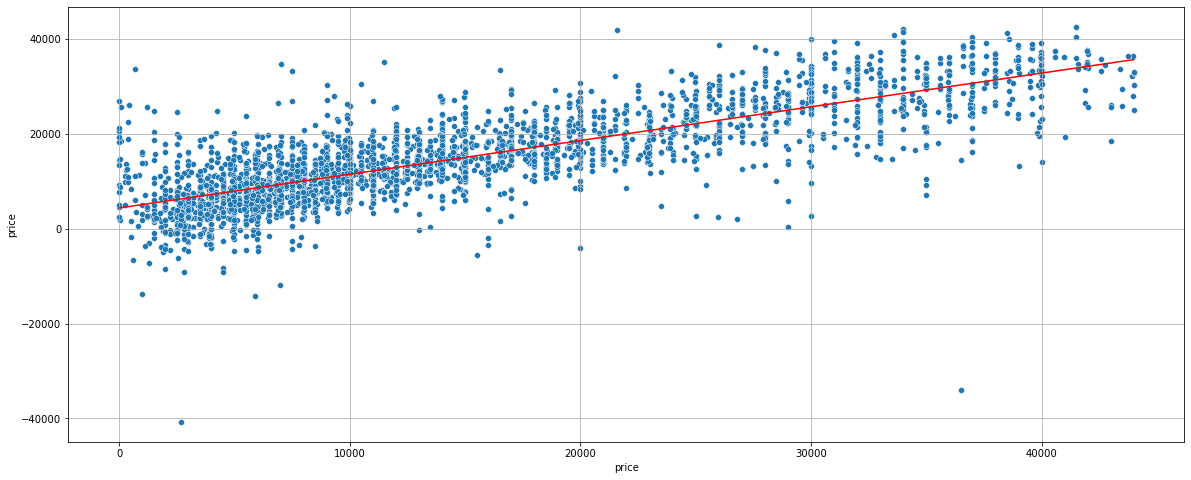

In [76]:
plt.figure(figsize=(20, 8))
plt.grid(True)
sns.scatterplot(x=y_test, y=lasso_test_preds)
slope, intercept = np.polyfit(y_test, lasso_test_preds, 1)
line = slope * y_test + intercept
sns.lineplot(x=y_test, y=line, color='red')

#### Plot Residuals

<AxesSubplot:ylabel='price'>

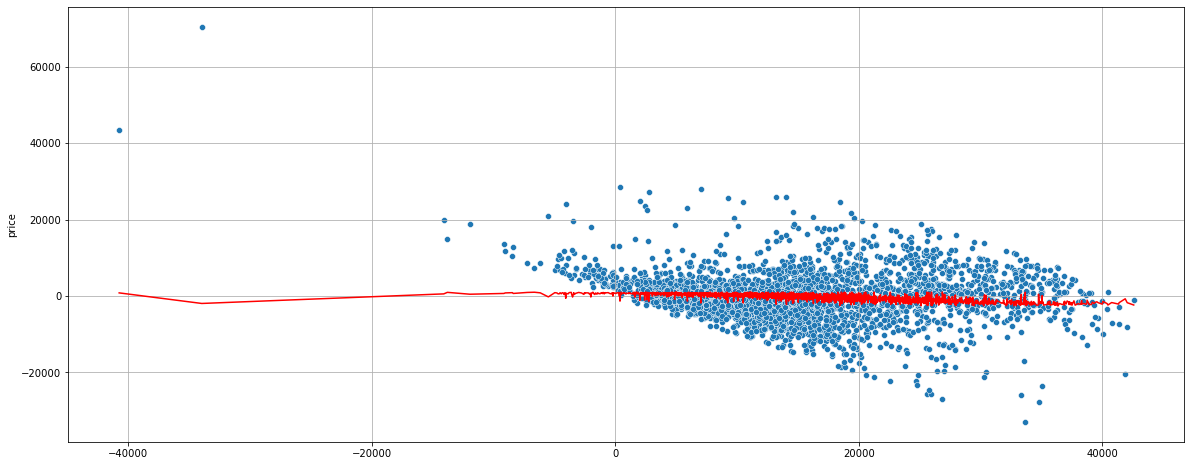

In [65]:
residuals = y_test - lasso_test_preds
plt.figure(figsize=(20,8))
plt.grid(True)
sns.scatterplot(x=lasso_test_preds, y=residuals)
slope, intercept = np.polyfit(lasso_test_preds, residuals, 1)
line = slope * y_test + intercept
sns.lineplot(x=lasso_test_preds, y=line, color='red')

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.